In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    X = np.load("data/ex7_X.npy")
    return X

# =================== Part 1: Random Initialization ======================

def kMeans_init_centroids(X, K):

    # randomly shuffles the indices of the examples
    randidx = np.random.permutation(X.shape[0])

    # select the first K examples based on random permutation of indices
    centroids = X[randidx[:K]]

    return centroids

In [2]:
# ================== Part 2: Find Closest Centroids ====================

def find_closest_centroids(X, centroids):
    '''
    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): K centroids

    Returns:
        idx (ndarray): (m,) closest centroids
    '''

    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m, dtype=int)

    for i in range(m):
        # array to hold distance between X[i] and each centroids[j]
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(X[i] - centroids[j]))
        idx[i] = np.argmin(distance)

    return idx

In [3]:
X = load_data()
print(X.shape)

initial_centroids = kMeans_init_centroids(X, 3)
idx = find_closest_centroids(X, initial_centroids)
print(idx[:3])

(300, 2)
[0 1 1]


In [4]:
# ===================== Part 3: Compute Means =========================

def compute_centroids(X, idx, K):
    '''
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    '''

    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)
    
    return centroids

In [5]:
K = 3
centroids = compute_centroids(X, idx, K)
print(centroids)

[[2.76117723 2.15293973]
 [5.466417   3.43223425]
 [0.96166158 5.14955564]]


In [6]:
# ===================== Part 4: K-Means Clustering =========================

def run_kMeans(X, initial_centroids, max_iters=10):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m)

    for i in range(max_iters):
        print(f"Iteration {i+1}/{max_iters}")
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)

    return centroids, idx

centroids, idx = run_kMeans(X, initial_centroids, max_iters=10)

print(centroids, idx)

Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
[[3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]] [2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2]


In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

(128, 128, 3)


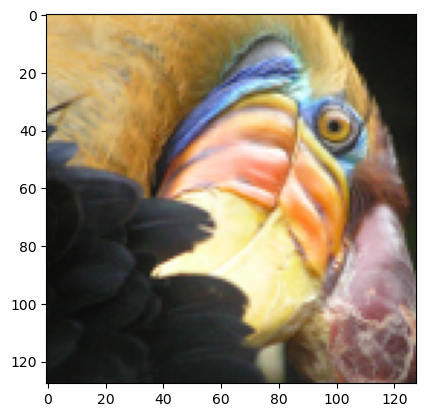

In [7]:
import numpy as np
import matplotlib.pyplot as plt

original_img = plt.imread("data/bird_small.png")

plt.imshow(original_img)

print(original_img.shape)

# This is a 128x128 image with 3 color channels (RGB)
# For example [50, 33, 2] gives the blue intesnity of the pixel at row 50, column 33

In [8]:
# we need to transform the matrix into a 2D matrix
# reshape to create a m x 3 matrix of pixel colors (where = m = 128*128 = 16384)
# Each row will contain the RGB pixel values

original_img = original_img / 255

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [9]:
# You should try different values of K and max_iters here

K = 16 # you want to reduce it to 16 colors
max_iters = 10

initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
print(idx.shape, idx[:5])

Iteration 1/10
Iteration 2/10
Iteration 3/10
Iteration 4/10
Iteration 5/10
Iteration 6/10
Iteration 7/10
Iteration 8/10
Iteration 9/10
Iteration 10/10
(16384,) [5 5 5 5 5]


After finding the top K = 16 colors to represent the image, you can assign each pixel position to its closest centroid using the find_closest_centroids function (idx, already done). You can represent the original img using the centroid assignment of the pixel. 

Notice that you have significantly reduced the number of bits that are required to describe the image. 
* The original image required 24 bits for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits. |
* The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. 
* The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

In [10]:
# For each index in idx, it selects the corresponding centroid from the centroids array. 
# The result is an array where each data point is replaced by its closest centroid.
X_recovered = centroids[idx, :]
# Reshape into proper dimensions
X_recovered = np.reshape(X_recovered, (original_img.shape))

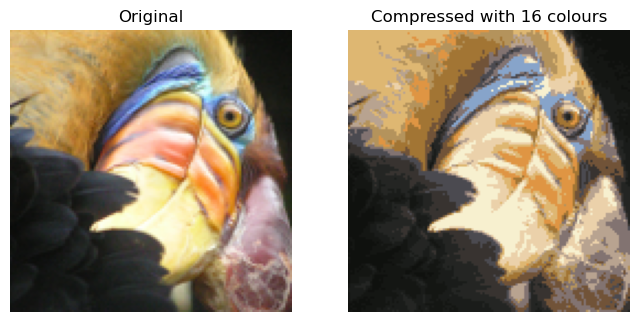

In [11]:
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()